In [1]:
%reset
import sys, os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

# Change the current working directory to the desired path
os.chdir('/mnt/home/spandey/ceph/GODMAX/src/')
from jax.config import config
config.update("jax_enable_x64", True)
import numpy as np
import jax.numpy as jnp
import colossus 
from jax import vmap, grad
import h5py as h5
%matplotlib inline
import matplotlib.pyplot as pl
pl.rc('text', usetex=False)
# Palatino
pl.rc('font', family='DejaVu Sans')
import pyccl as ccl


%load_ext autoreload
%autoreload 2




In [2]:
import h5py as h5
import numpy as np
import colossus 
%matplotlib inline
import matplotlib.pyplot as pl
pl.rc('text', usetex=False)
# Palatino
pl.rc('font', family='DejaVu Sans')




In [3]:
import pandas as pd
import pickle as pk
import h5py as h5
df_sims = pk.load(open('/mnt/home/spandey/ceph/GODMAX/data/TNG/TNG300-1_matched_halos_profiles.pkl', 'rb'))
df_sims.keys()
# dfname = '/mnt/home/spandey/ceph/GODMAX/data/TNG/TNG300-1_diffgas_snap99.hdf5'
# df = h5.File(dfname, 'r')
# Halos = pd.read_hdf(dfname, key = 'Halos')

x_array_data = df_sims['r_r200c']
ind_sel_data = df_sims['ind_sel']
M200c_data = df_sims['M200c']
c200c_data = df_sims['c200c']
M200c_data_hydro = df_sims['M200c_hydro']
rho_dm_data = df_sims['rho_dm']
rho_gas_data = df_sims['rho_gas']
rho_star_data = df_sims['rho_star']
rho_matter_data = df_sims['rho_matter']
P_gas_data = df_sims['P_gas']

M200c_data = M200c_data[ind_sel_data]
c200c_data = c200c_data[ind_sel_data]
M200c_data_hydro = M200c_data_hydro[ind_sel_data]
rho_dm_data = rho_dm_data[ind_sel_data]
rho_gas_data = rho_gas_data[ind_sel_data]
rho_star_data = rho_star_data[ind_sel_data]
rho_matter_data = rho_matter_data[ind_sel_data]
P_gas_data = P_gas_data[ind_sel_data]




In [4]:
# (Halos.keys())
# Halos['rhoDM_bin0']
# list(df['Halos'].keys())
# print(r_r200c_data.shape, ind_sel_data.shape, M200c_data.shape, c200c_data.shape, rho_dm_data.shape, rho_gas_data.shape, rho_star_data.shape, rho_matter_data.shape, P_gas_data.shape)
Mmin, Mmax = 10**14.3, 10**14.6
# Mmin, Mmax = 10**13.3, 10**13.6
indsel_M = np.where((M200c_data > Mmin) & (M200c_data < Mmax))[0]
# print(indsel_M)
# delete index 105 from indsel_M:
# indsel_M = np.delete(indsel_M, 273)
# indsel_M = np.delete(indsel_M, 274)
rho_matter_data_sel = rho_matter_data[indsel_M]
# find indices in rho_matter_data_sel at axis 0, where any value in axis 1 is greater than 1e16:
indsel_rho = np.where(np.any(rho_matter_data_sel > 1e16, axis=1))[0]
indsel_M = np.delete(indsel_M, indsel_rho)
rho_matter_data_sel = rho_matter_data[indsel_M]
rho_gas_data_sel = rho_gas_data[indsel_M]
P_gas_data_sel = P_gas_data[indsel_M]
rho_dmb_dv = np.mean(rho_matter_data_sel, axis=0)
rho_gas_dv = np.mean(rho_gas_data_sel, axis=0)
P_gas_dv = np.mean(P_gas_data_sel, axis=0)
# M200c_data


In [5]:
# indsel_M[105]

In [6]:
# np.amax(rho_matter_data_sel)
# np.argmax(rho_matter_data_sel, axis=0)
indices = np.where(rho_matter_data_sel == rho_matter_data_sel.max())
indices

(array([33]), array([0]))

In [7]:
# pl.figure()
# pl.loglog(x_array_data, rho_matter_data_sel[105], label = 'DM')
# # pl.loglog(x_array_data, rho_gas_dv, label = 'Gas')
# # pl.loglog(x_array_data, P_gas_dv, label = 'Gas')
# pl.legend()

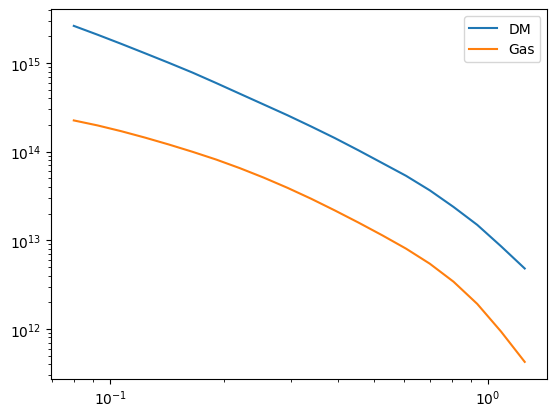

In [8]:
# !pip install tables
# R = np.geomspace(0.03, 2, 25)
# rho_dmb_dv.shape, rho_gas_dv.shape, P_gas_dv.shape
pl.figure()
pl.loglog(x_array_data, rho_dmb_dv, label = 'DM')
pl.loglog(x_array_data, rho_gas_dv, label = 'Gas')
# pl.loglog(x_array_data, P_gas_dv, label = 'Gas')
pl.legend()


In [9]:
cosmo_params_dict = {'flat': True, 'H0': 67.74, 'Om0': 0.3089, 'Ob0': 0.0486, 'sigma8': 0.8159, 'ns': 0.9669, 'w0':-1.0}
sim_params_dict = {}
# sim_params_dict['nfw_trunc'] = True
# sim_params_dict['gamma_rhogas'] = 2.0
# sim_params_dict['delta_rhogas'] = 7.0
# sim_params_dict['theta_co'] = 0.3
# sim_params_dict['theta_ej'] = 3.0
# sim_params_dict['log10_Mc0'] = 0.0
# sim_params_dict['neg_bhse_plus_1'] = 0.833
# sim_params_dict['mu_beta'] = 0.3
# sim_params_dict['eta_star'] = 0.3
# sim_params_dict['eta_cga'] = 0.6
# sim_params_dict['A_starcga'] = 0.09
# sim_params_dict['log10_M1_starcga'] = 11.4
# sim_params_dict['epsilon_rt'] = 4.0
# sim_params_dict['nu_z'] = 0.0
# sim_params_dict['nu_M'] = 0.0
# sim_params_dict['log10_Mstar0'] = 13.0
# sim_params_dict['a_zeta'] = 0.3
# sim_params_dict['n_zeta'] = 2
# sim_params_dict['alpha_nt'] = 0.18
# sim_params_dict['beta_nt'] = 0.5
# sim_params_dict['n_nt'] = 0.3
# sim_params_dict['cosmo'] = cosmo_params_dict

sim_params_dict['nfw_trunc'] = True
sim_params_dict['gamma_rhogas'] = 2.0
sim_params_dict['delta_rhogas'] = 7.0
sim_params_dict['theta_co'] = 0.1
sim_params_dict['theta_ej'] = 3.0
sim_params_dict['log10_Mc0'] = 12.25
sim_params_dict['neg_bhse_plus_1'] = 0.833
sim_params_dict['mu_beta'] = 0.3
sim_params_dict['eta_star'] = 0.3
sim_params_dict['eta_cga'] = 0.6
sim_params_dict['A_starcga'] = 0.01
sim_params_dict['log10_M1_starcga'] = 11.4
sim_params_dict['epsilon_rt'] = 4.0
sim_params_dict['nu_z'] = 0.0
sim_params_dict['nu_M'] = 0.0
sim_params_dict['log10_Mstar0'] = 13.0
sim_params_dict['a_zeta'] = 0.3
sim_params_dict['n_zeta'] = 2
sim_params_dict['alpha_nt'] = 0.18
sim_params_dict['beta_nt'] = 0.5
sim_params_dict['n_nt'] = 0.3
sim_params_dict['cosmo'] = cosmo_params_dict


halo_params_dict = {}
halo_params_dict['rmin'], halo_params_dict['rmax'], halo_params_dict['nr'] = 5e-3, 3, 63
halo_params_dict['zmin'], halo_params_dict['zmax'], halo_params_dict['nz'] = 0.001, 0.002, 2
# halo_params_dict['zmin'], halo_params_dict['zmax'], halo_params_dict['nz'] = 0.001, 1.0, 10
halo_params_dict['lg10_Mmin'], halo_params_dict['lg10_Mmax'], halo_params_dict['nM'] = 12.0, 15.0, 64
halo_params_dict['cmin'], halo_params_dict['cmax'], halo_params_dict['nc'] = 1, 10, 64
halo_params_dict['ellmin'], halo_params_dict['ellmax'], halo_params_dict['nell'] = 8, 2**15, 64
halo_params_dict['sig_logc_z_array'] = np.ones(halo_params_dict['nz']) * 0.05
halo_params_dict['mdef'] = '200c'
halo_params_dict['hmf_model'] = 'T10'
halo_params_dict['conc_model'] = 'Diemer15'
halo_params_dict['do_corr_2h_mm'] = True

# halo_params_dict['do_corr_2h_mm'] = False

from astropy.io import fits
df = fits.open('/mnt/home/spandey/ceph/GODMAX/data/sim_3x2pt_simulated_DV_PKproject_values_bestfit_maglim_3x2LCDM_final.fits') 
z_array = df['nz_source'].data['Z_MID']
nz_info_dict = {}
nz_info_dict['z_array'] = z_array
nz_info_dict['nbins'] = 4
nz_info_dict['nz0'] = np.maximum(df['nz_source'].data['BIN1'], 1e-4)
nz_info_dict['nz1'] = np.maximum(df['nz_source'].data['BIN2'], 1e-4)
nz_info_dict['nz2'] = np.maximum(df['nz_source'].data['BIN3'], 1e-4)
nz_info_dict['nz3'] = np.maximum(df['nz_source'].data['BIN4'], 1e-4)
analysis_dict = {}
analysis_dict['nz_info_dict'] = nz_info_dict
analysis_dict['do_sheary'] = True
analysis_dict['do_shear2pt'] = True
analysis_dict['do_yy'] = False

df_data = fits.open('/mnt/home/spandey/ceph/GODMAX/data/DES_ACT_full_data_theorycov_2.5.fits')
theta_data = df_data['compton_shear'].data['ANG'][0:20]

analysis_dict['ellmin_transf'], analysis_dict['ellmax_transf'], analysis_dict['nell_transf'] = 8, 2**15, 16384
analysis_dict['angles_data_array'] = jnp.array(theta_data)
analysis_dict['beam_fwhm_arcmin'] = 1.6
analysis_dict['want_like_diff'] = False
analysis_dict['calc_nfw_only'] = True





In [10]:
# 10**14.5

In [11]:
# lgM_bin_min = jnp.array([11.7, 12.7, 13.3, 13.7, 14.3, 14.7])
# lgM_bin_max = jnp.array([12.0, 13.0, 13.6, 14.0, 14.7, 15.0])

lgM_bin_min = jnp.array([14.3])
lgM_bin_max = jnp.array([14.6])

# lgM_bin_min = jnp.array([13.3])
# lgM_bin_max = jnp.array([13.6])

lgM_bin_mean = 0.5*(lgM_bin_min + lgM_bin_max)
zmean = 0.0015

# import pickle as pk
# df_at = pk.load(open('/mnt/home/spandey/ceph/GODMAX/data/ANTILES/profs_lowT.pk','rb'))
# # df_at = pk.load(open('/mnt/home/spandey/ceph/GODMAX/data/ANTILES/profs_highT.pk','rb'))
# print(df_at.keys())


# x_array_data = jnp.logspace(jnp.log10(0.01), jnp.log10(3), 20)
# log10_x_array_data_edges = jnp.array([-2.,-1.87379263,-1.74758526,-1.62137789,-1.49517052,-1.36896316,-1.24275579,-1.11654842,-0.99034105,-0.86413368,-0.73792631,-0.61171894,-0.48551157,-0.3593042,-0.23309684,-0.10688947,0.0193179,0.14552527,0.27173264,0.39794001])
# x_array_data_edges = 10**log10_x_array_data_edges
# x_array_data_edges_min = x_array_data_edges[:-1]
# x_array_data_edges_max = x_array_data_edges[1:]
# x_array_data = 10**(0.5*(log10_x_array_data_edges[1:] + log10_x_array_data_edges[:-1]))

# x_array_data = df_at['r_r200c']

# rho_dmb_dv = np.array([df_at['rho_tot_low'], df_at['rho_tot_high']])
# rho_gas_dv = np.array([df_at['rho_gas_low'], df_at['rho_gas_high']])
# P_gas_dv = np.array([df_at['Pth_low'], df_at['Pth_high']])
dmb_dv_flatten = rho_dmb_dv.flatten()
gas_dv_flatten = rho_gas_dv.flatten()

dv_combined = jnp.concatenate((dmb_dv_flatten, gas_dv_flatten))
sigma_value_combined = 0.1*dv_combined
cov_combined = jnp.diag(sigma_value_combined**2)
precision_combined = jnp.linalg.inv(cov_combined)




In [12]:
# # M_dmb_dv.shape


# from colossus.cosmology import cosmology
# from colossus.halo import concentration
# cosmo = cosmology.setCosmology('myCosmo', **cosmo_params_dict)
# cmean_array_test = concentration.concentration(BCMP_test.M_array, '200c', zmean, model = 'diemer15')
# pl.figure()
# pl.plot(BCMP_test.M_array, cmean_array_test)
# pl.xscale('log')
# pl.xlim(10**13.7, 10**14.0)


In [13]:
from colossus.cosmology import cosmology
from colossus.halo import concentration
cosmo = cosmology.setCosmology('myCosmo', **cosmo_params_dict)
cmean_array = concentration.concentration(10**lgM_bin_mean, '200c', zmean, model = 'diemer15')
cmean_array = jnp.array(cmean_array)


In [14]:
from colossus.lss import mass_function
lg10_Mmin, lg10_Mmax, nM = halo_params_dict['lg10_Mmin'], halo_params_dict['lg10_Mmax'], halo_params_dict['nM']
M200c_array = jnp.logspace(lg10_Mmin, lg10_Mmax, nM)
dndlnM_th = mass_function.massFunction(M200c_array, zmean, mdef = '200c', model = 'tinker08', q_out='dndlnM')
dndlnM_th = jnp.array(dndlnM_th)



In [15]:
from get_BCMP_profile_jit import BCM_18_wP
BCMP_test = BCM_18_wP(sim_params_dict, halo_params_dict)
# r_r200c_array_data = jnp.logspace(jnp.log10(0.01), jnp.log10(3), 20)

# BCMP_test_vary = BCM_18_wP(sim_params_dict, halo_params_dict)
# theory = BCMP_test_vary.rho_dmb_mat




In [16]:
masks_all = np.zeros((len(lgM_bin_min),len(x_array_data), halo_params_dict['nc'], halo_params_dict['nz'], halo_params_dict['nM']))
dndlnM_jb_repeat_all = np.zeros((len(lgM_bin_min),len(x_array_data), halo_params_dict['nc'], halo_params_dict['nz'], halo_params_dict['nM']))
# dndlnM_jb_repeat_all = {}
M_new = np.zeros_like(BCMP_test.M_array)
norm_value_all = np.zeros(len(lgM_bin_min))
for jb in range(len(lgM_bin_min)):
    lgM_min_jb = lgM_bin_min[jb]
    lgM_max_jb = lgM_bin_max[jb]
    cmean_jb = cmean_array[jb]
    c_array_th = jnp.exp(jnp.linspace(jnp.log(halo_params_dict['cmin']), jnp.log(halo_params_dict['cmax']), halo_params_dict['nc']))
    indc = jnp.argmin(jnp.abs(c_array_th - cmean_jb))
    print(indc, cmean_jb)
    # lgM_array_th = jnp.log10(jnp.logspace(halo_params_dict['lg10_Mmin'], halo_params_dict['lg10_Mmax'], halo_params_dict['nM']))
    # M_array_th = 10**lgM_array_th
    M_array_th = BCMP_test.Mdmb_r200_mat[indc, 0, :]
    lgM_array_th = jnp.log10(M_array_th)
    indM_min = jnp.argmin(jnp.abs(lgM_array_th - lgM_min_jb))
    indM_max = jnp.argmin(jnp.abs(lgM_array_th - lgM_max_jb))
    # mask = jnp.zeros((halo_params_dict['nr'], halo_params_dict['nc'], halo_params_dict['nz'], halo_params_dict['nM']))
    # mask = jax.ops.index_update(mask, jax.ops.index[:, indc, 0, indM_min:indM_max+1], 1)
    # mask = mask.at[:, indc, 0, indM_min:indM_max+1].set(1)
    masks_all[jb,:, indc, 0, indM_min:indM_max+1] = 1
    print(jb, indc, 0, indM_min,indM_max+1)
    dndlnM_jb_repeat = jnp.tile(dndlnM_th.reshape(1,1,1,masks_all.shape[-1]), (masks_all.shape[1],masks_all.shape[2],masks_all.shape[3], 1))
    # dndlnM_jb_repeat *= mask
    # dndlnM_jb_repeat_all[jb] = dndlnM_jb_repeat
    norm_value = jnp.trapz(dndlnM_th[indM_min:indM_max+1], jnp.log(M_array_th)[indM_min:indM_max+1])
    norm_value_all[jb] = norm_value
    dndlnM_jb_repeat_all[jb,...] = dndlnM_jb_repeat * masks_all[jb,...]

masks_all = jnp.array(masks_all.astype(int))
dndlnM_jb_repeat_all = jnp.array(dndlnM_jb_repeat_all)
norm_value_all = jnp.array(norm_value_all)


38 4.022836963014001
0 38 0 49 56


In [17]:
# cmean_array_all_th = concentration.concentration(BCMP_test.M_array, '200c', zmean, model = 'diemer15')
# M200c_dmb_val = np.zeros_like(BCMP_test.M_array)
# for jM in range(len(BCMP_test.M_array)):
#     indc = jnp.argmin(jnp.abs(BCMP_test.conc_array - cmean_array_all_th[jM]))
#     # print(indc)
#     M200c_dmb_val[jM] = BCMP_test.Mdmb_r200_mat[indc, 0, jM]




In [18]:
# M200c_dmb_val
# M200c_dmb_val

In [19]:
# pl.figure()
# # pl.scatter(np.log10(BCMP_test.M_array), np.log10(BCMP_test.Mdmb_r200_mat[indc, 0, :]))
# pl.plot(np.log10(BCMP_test.M_array), (M200c_dmb_val/BCMP_test.M_array))
# # pl.plot([12,15], [12,15], 'k--')
# # pl.xscale('log')
# # pl.yscale('log')




In [20]:
# # pl.figure()
# # pl.plot(BCMP_test.r_array, BCMP_test.Pth_mat[:,0,0,30], label = r'z=' + str(BCMP_test.z_array[0]))
# # pl.plot(BCMP_test.r_array, BCMP_test.Pth_mat[:,0,5,30], label = r'z=' + str(BCMP_test.z_array[5]))
# # pl.plot(BCMP_test.r_array, BCMP_test.Pth_mat[:,0,10,30], label = r'z=' + str(BCMP_test.z_array[10]))
# # pl.legend()
# # pl.xscale('log')
# # pl.yscale('log')
# # pl.ylim(1e-4,50)
# log10M_edges_min = np.array([13.0, 13.75, 14.25])
# log10M_edges_max = np.array([13.25, 14.0, 14.5])
# log10M_cents = 0.5*(log10M_edges_min + log10M_edges_max)
# log10M_array = jnp.log10(BCMP_test.M_array)
# indM0 = jnp.argmin(jnp.abs(log10M_array - log10M_cents[0]))
# indM1 = jnp.argmin(jnp.abs(log10M_array - log10M_cents[1]))
# indM2 = jnp.argmin(jnp.abs(log10M_array - log10M_cents[2]))

# cmean_array_th = concentration.concentration(BCMP_test.M_array, '200c', zmean, model = 'diemer15')
# indc0 = jnp.argmin(jnp.abs(BCMP_test.conc_array - cmean_array_th[indM0]))
# indc1 = jnp.argmin(jnp.abs(BCMP_test.conc_array - cmean_array_th[indM1]))
# indc2 = jnp.argmin(jnp.abs(BCMP_test.conc_array - cmean_array_th[indM2]))




In [21]:
# pl.figure()
# # pl.plot(BCMP_test.r_array, BCMP_test.rho_dmb_mat[:,0,0,15], color='b')
# # pl.plot(BCMP_test.r_array, BCMP_test.rho_dmb_mat[:,0,0,30], color='orange')
# # pl.plot(BCMP_test.r_array, BCMP_test.rho_dmb_mat[:,0,0,50], color='red')

# # pl.plot(BCMP_test.r_array/BCMP_test.r200c_mat[15,0], BCMP_test.rho_nfw_mat[:,50,0,15], color='b')
# # pl.plot(BCMP_test.r_array/BCMP_test.r200c_mat[30,0], BCMP_test.rho_nfw_mat[:,30,0,30], color='orange')
# # pl.plot(BCMP_test.r_array/BCMP_test.r200c_mat[50,0], BCMP_test.rho_nfw_mat[:,15,0,50], color='red')

# pl.plot(BCMP_test.r_array/BCMP_test.r200c_mat[indM0,0], BCMP_test.rho_dmb_mat[:,indc0,0,indM0], ls='-', color='b')
# pl.plot(BCMP_test.r_array/BCMP_test.r200c_mat[indM1,0], BCMP_test.rho_dmb_mat[:,indc1,0,indM1], ls='-',color='orange')
# pl.plot(BCMP_test.r_array/BCMP_test.r200c_mat[indM2,0], BCMP_test.rho_dmb_mat[:,indc2,0,indM2], ls='-',color='red')


# pl.plot(BCMP_test.r_array/BCMP_test.r200c_mat[indM0, 0], BCMP_test.rho_clm_mat[:,indc0,0,indM0], ls='--', color='b')
# pl.plot(BCMP_test.r_array/BCMP_test.r200c_mat[indM1, 0], BCMP_test.rho_clm_mat[:,indc1,0,indM1], ls='--',color='orange')
# pl.plot(BCMP_test.r_array/BCMP_test.r200c_mat[indM2, 0], BCMP_test.rho_clm_mat[:,indc2,0,indM2], ls='--',color='red')

# pl.plot(BCMP_test.r_array/BCMP_test.r200c_mat[indM0, 0], BCMP_test.rho_cga_mat[:,indc0,0,indM0], ls='-.', color='b')
# pl.plot(BCMP_test.r_array/BCMP_test.r200c_mat[indM1, 0], BCMP_test.rho_cga_mat[:,indc1,0,indM1], ls='-.',color='orange')
# pl.plot(BCMP_test.r_array/BCMP_test.r200c_mat[indM2, 0], BCMP_test.rho_cga_mat[:,indc2,0,indM2], ls='-.',color='red')

# pl.plot(BCMP_test.r_array/BCMP_test.r200c_mat[indM0, 0], BCMP_test.rho_gas_mat[:,indc0,0,indM0], ls=':', color='b')
# pl.plot(BCMP_test.r_array/BCMP_test.r200c_mat[indM1, 0], BCMP_test.rho_gas_mat[:,indc1,0,indM1], ls=':',color='orange')
# pl.plot(BCMP_test.r_array/BCMP_test.r200c_mat[indM2, 0], BCMP_test.rho_gas_mat[:,indc2,0,indM2], ls=':',color='red')


# # pl.plot(BCMP_test.r_array/BCMP_test.r200c_mat[15,0], BCMP_test.rho_nfw_mat[:,50,0,15], color='b')
# # pl.plot(BCMP_test.r_array/BCMP_test.r200c_mat[30,0], BCMP_test.rho_nfw_mat[:,30,0,30], color='orange')
# # pl.plot(BCMP_test.r_array/BCMP_test.r200c_mat[50,0], BCMP_test.rho_nfw_mat[:,15,0,50], color='red')

# # pl.plot(BCMP_test.r_array/BCMP_test.r200c_mat[15,0], BCMP_test.rho_dmb_mat[:,50,0,15], color='b')
# # pl.plot(BCMP_test.r_array/BCMP_test.r200c_mat[30,0], BCMP_test.rho_dmb_mat[:,30,0,30], color='orange')
# # pl.plot(BCMP_test.r_array/BCMP_test.r200c_mat[50,0], BCMP_test.rho_dmb_mat[:,15,0,50], color='red')

# pl.legend()
# pl.xscale('log')
# pl.yscale('log')
# pl.ylim(1e12,1e17)
# pl.xlim(0.03,2)


In [22]:
# x_array_data_edges_min
# x_array_data_edges_max
# rho_dmb.shape
# BCMP_test_vary.r_array.shape
# BCMP_test_vary.r200c_mat.shape
# x_array_data_edges_min



In [23]:
# x_array_data_edges_max



In [24]:
# x_array_data = jnp.logspace(jnp.log10(0.01), jnp.log10(3), 20)
rho_dmb = BCMP_test.rho_dmb_mat
rho_gas = BCMP_test.rho_gas_mat
Pth_gas = BCMP_test.Pth_mat
from jax_cosmo.scipy.interpolate import interp
# def interp_rho_dmb(jb, jc, jz, jM):
#     rho_dmb_here = rho_dmb[:,jc, jz, jM]
#     r_theory = BCMP_test.r_array
#     r200_here = BCMP_test.r200c_mat[jM, jz]
#     x_bin_min = x_array_data_edges_min[jb]
#     x_bin_max = x_array_data_edges_max[jb]
#     x_array_here = jnp.logspace(jnp.log10(x_bin_min), jnp.log10(x_bin_max), 20)
#     val_x_here = jnp.exp(jnp.interp(jnp.log(x_array_here), jnp.log(r_theory/r200_here), jnp.log(rho_dmb_here)))
#     integrand = 4*jnp.pi*x_array_here**2 * val_x_here * (r200_here**3)
#     val_out = jnp.trapz(integrand, x_array_here)
#     return val_out

# def interp_rho_gas(jb, jc, jz, jM):
#     rho_dmb_here = rho_gas[:,jc, jz, jM]
#     r_theory = BCMP_test.r_array
#     r200_here = BCMP_test.r200c_mat[jM, jz]
#     x_bin_min = x_array_data_edges_min[jb]
#     x_bin_max = x_array_data_edges_max[jb]
#     x_array_here = jnp.logspace(jnp.log10(x_bin_min), jnp.log10(x_bin_max), 20)
#     val_x_here = jnp.exp(jnp.interp(jnp.log(x_array_here), jnp.log(r_theory/r200_here), jnp.log(rho_dmb_here)))
#     integrand = 4*jnp.pi*x_array_here**2 * val_x_here * (r200_here**3)
#     val_out = jnp.trapz(integrand, x_array_here)
#     return val_out

# vmap_func1 = vmap(interp_rho_dmb, (0, None, None, None))
# vmap_func2 = vmap(vmap_func1, (None, 0, None, None))
# vmap_func3 = vmap(vmap_func2, (None, None, 0, None))
# vmap_func4 = vmap(vmap_func3, (None, None, None, 0))
# Mtot_xbins_interp = vmap_func4(jnp.arange(len(x_array_data_edges_min)), jnp.arange(halo_params_dict['nc']), jnp.arange(halo_params_dict['nz']), jnp.arange(halo_params_dict['nM'])).T

# vmap_func1 = vmap(interp_rho_gas, (0, None, None, None))
# vmap_func2 = vmap(vmap_func1, (None, 0, None, None))
# vmap_func3 = vmap(vmap_func2, (None, None, 0, None))
# vmap_func4 = vmap(vmap_func3, (None, None, None, 0))
# Mgas_xbins_interp = vmap_func4(jnp.arange(len(x_array_data_edges_min)), jnp.arange(halo_params_dict['nc']), jnp.arange(halo_params_dict['nz']), jnp.arange(halo_params_dict['nM'])).T


def interp_rho_dmb(jc, jz, jM):
    rho_dmb_here = rho_dmb[:,jc, jz, jM]
    r_theory = BCMP_test.r_array
    r200_here = BCMP_test.r200c_mat[jM, jz]
    val_out = jnp.exp(jnp.interp(jnp.log(x_array_data), jnp.log(r_theory/r200_here), jnp.log(rho_dmb_here)))
    return val_out


def interp_rho_gas(jc, jz, jM):
    rho_dmb_here = rho_gas[:,jc, jz, jM]
    r_theory = BCMP_test.r_array
    r200_here = BCMP_test.r200c_mat[jM, jz]
    val_out = jnp.exp(jnp.interp(jnp.log(x_array_data), jnp.log(r_theory/r200_here), jnp.log(rho_dmb_here)))
    return val_out


def interp_Pth_gas(jc, jz, jM):
    rho_dmb_here = Pth_gas[:,jc, jz, jM]
    r_theory = BCMP_test.r_array
    r200_here = BCMP_test.r200c_mat[jM, jz]
    val_out = jnp.exp(jnp.interp(jnp.log(x_array_data), jnp.log(r_theory/r200_here), jnp.log(rho_dmb_here)))
    return val_out

vmap_func1 = vmap(interp_rho_dmb, (0, None, None))
vmap_func2 = vmap(vmap_func1, (None, 0, None))
vmap_func3 = vmap(vmap_func2, (None, None, 0))
rhodmb_xbins_interp = vmap_func3(jnp.arange(halo_params_dict['nc']), jnp.arange(halo_params_dict['nz']), jnp.arange(halo_params_dict['nM'])).T


vmap_func1 = vmap(interp_rho_gas, (0, None, None))
vmap_func2 = vmap(vmap_func1, (None, 0, None))
vmap_func3 = vmap(vmap_func2, (None, None, 0))
rhogas_xbins_interp = vmap_func3(jnp.arange(halo_params_dict['nc']), jnp.arange(halo_params_dict['nz']), jnp.arange(halo_params_dict['nM'])).T


vmap_func1 = vmap(interp_Pth_gas, (0, None, None))
vmap_func2 = vmap(vmap_func1, (None, 0, None))
vmap_func3 = vmap(vmap_func2, (None, None, 0))
Pth_xbins_interp = vmap_func3(jnp.arange(halo_params_dict['nc']), jnp.arange(halo_params_dict['nz']), jnp.arange(halo_params_dict['nM'])).T




In [25]:
# BCMP_test.r_array/BCMP_test.r200c_mat[10, 0]
# BCMP_test.beta_mat


In [26]:
import jax
def get_mean_rhodmb(jb):
    lgM_array_th = jnp.log10(BCMP_test.M_array)
    M_array_th = 10**lgM_array_th
    mask = masks_all[jb]
    # apply mask:
    rho_dmb_rM = rhodmb_xbins_interp * mask
    dndlnM_jb_repeat = dndlnM_jb_repeat_all[jb]
    rho_dmb_mean = jnp.trapz(rho_dmb_rM * dndlnM_jb_repeat, jnp.log(M_array_th), axis=-1) / norm_value_all[jb]
    rho_dmb_mean = jnp.sum(rho_dmb_mean, axis=1)
    rho_dmb_mean = jnp.sum(rho_dmb_mean, axis=1)
    return rho_dmb_mean

def get_mean_rhogas(jb):
    lgM_array_th = jnp.log10(BCMP_test.M_array)
    M_array_th = 10**lgM_array_th
    mask = masks_all[jb]
    # apply mask:
    rho_gas_rM = rhogas_xbins_interp * mask
    dndlnM_jb_repeat = dndlnM_jb_repeat_all[jb]
    rho_dmb_mean = jnp.trapz(rho_gas_rM * dndlnM_jb_repeat, jnp.log(M_array_th), axis=-1) / norm_value_all[jb]
    rho_dmb_mean = jnp.sum(rho_dmb_mean, axis=1)
    rho_dmb_mean = jnp.sum(rho_dmb_mean, axis=1)
    return rho_dmb_mean

def get_mean_Pth(jb):
    lgM_array_th = jnp.log10(BCMP_test.M_array)
    M_array_th = 10**lgM_array_th
    mask = masks_all[jb]
    # apply mask:
    Pth_gas_rM = Pth_xbins_interp * mask
    dndlnM_jb_repeat = dndlnM_jb_repeat_all[jb]
    Pth_mean = jnp.trapz(Pth_gas_rM * dndlnM_jb_repeat, jnp.log(M_array_th), axis=-1) / norm_value_all[jb]
    Pth_mean = jnp.sum(Pth_mean, axis=1)
    Pth_mean = jnp.sum(Pth_mean, axis=1)
    return Pth_mean


rho_dmb_dv_th = vmap(get_mean_rhodmb)(jnp.arange(len(lgM_bin_min)))
rho_gas_dv_th = vmap(get_mean_rhogas)(jnp.arange(len(lgM_bin_min)))
Pth_gas_dv_th = vmap(get_mean_Pth)(jnp.arange(len(lgM_bin_min)))

# dmb_dv_flatten = M_dmb_dv.flatten()
# gas_dv_flatten = M_gas_dv.flatten()

# dv_combined = jnp.concatenate((dmb_dv_flatten, gas_dv_flatten))
# sigma_value_combined = 0.1*dv_combined
# cov_combined = jnp.diag(sigma_value_combined**2)
# precision_combined = jnp.linalg.inv(cov_combined)


In [27]:
# Mmin, Mmax
cosmo_params_dict


{'flat': True,
 'H0': 67.74,
 'Om0': 0.3089,
 'Ob0': 0.0486,
 'sigma8': 0.8159,
 'ns': 0.9669,
 'w0': -1.0}

In [28]:
# P_gas_dv.shape
# Pth_gas_dv_th.shape
from get_B12_profile import Battaglia_12_16
# M
B12_prof = Battaglia_12_16((Mmin + Mmax)/2., 0.0, cosmo)
# R200c
from colossus.halo import mass_so
R200c = mass_so.M_to_R((Mmin + Mmax)/2., 0.0, '200c')/1e3
PB12 = B12_prof.get_Pth(x_array_data * R200c)


Text(0.5, 1.0, '$14.3 < \\log{(M)} < 14.6$')

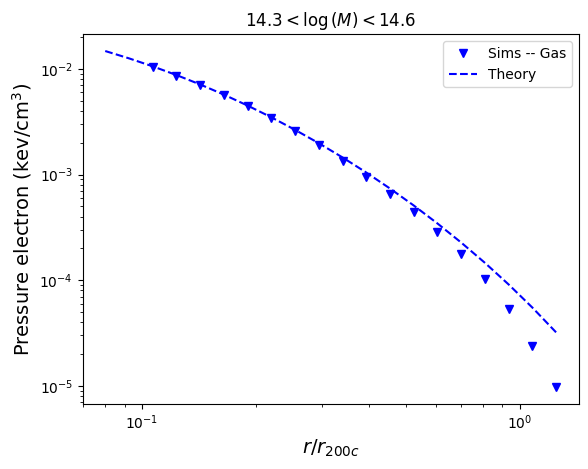

In [39]:
# # rho_dmb_dv.shape
# h = 0.7
import matplotlib.pyplot as pl
pl.figure()
pl.errorbar(x_array_data[2:], P_gas_dv[2:],ls='', marker='v', ms=6.0, color='b' , label='Sims -- Gas')
pl.errorbar(x_array_data, 0.518*Pth_gas_dv_th[0,:],ls='--', color='b' , label='Theory')
# pl.errorbar(x_array_data, PB12,ls=':', color='red' , label='Battaglia')
# pl.errorbar(x_array_data, P_gas_dv[1,:],ls='-' , color='b' , label='High mass, sims')
# pl.errorbar(x_array_data, Pth_gas_dv_th[1,:],ls='--' , color='b' )
# pl.plot(BCMP_test_vary.r_array, rho_gas_dv[-1], ls='-' )
# pl.plot(BCMP_test_vary.r_array, BCMP_test_vary.rho_dmb_mat[:,indc,0,indM_min], ls='--' )
pl.xscale('log')
pl.yscale('log')
pl.legend()
pl.xlabel(r'$r/r_{200c}$', size=14)
pl.ylabel(r'Pressure electron (kev/${\rm cm}^3$)', size=14)
# pl.title(r'$14.0 < \log{(M)} < 14.3$')
pl.title(r'$14.3 < \log{(M)} < 14.6$')




Text(0.5, 1.0, '$14.3 < \\log{(M)} < 14.6$')

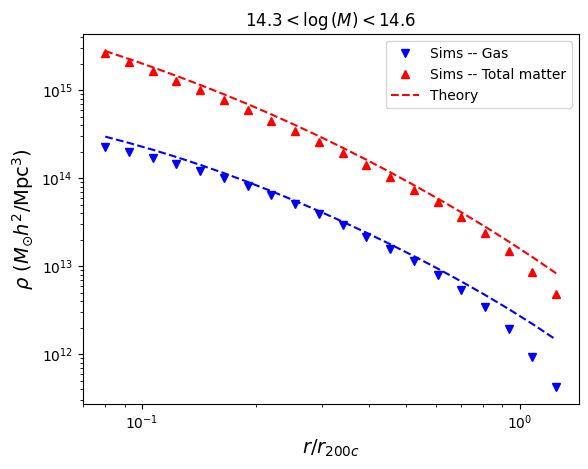

In [38]:
# # rho_dmb_dv.shape
h = 0.7
pl.figure()
pl.errorbar(x_array_data, rho_dmb_dv,ls='', marker='^', ms=6.0, color='r' , label='Sims -- Total matter')
pl.errorbar(x_array_data, rho_dmb_dv_th[0,:],ls='--', color='r' , label='Theory')
# pl.errorbar(x_array_data, rho_dmb_dv[1,:],ls='-' , color='b' , label='High mass, sims')
# pl.errorbar(x_array_data, rho_dmb_dv_th[1,:],ls='--' , color='b' )
pl.plot(x_array_data, rho_gas_dv,ls='', marker='v', ms=6.0, color='b' , label='Sims -- Gas')
pl.plot(x_array_data, rho_gas_dv_th[0,:], color='b', ls='--' )
# pl.plot(BCMP_test_vary.r_array, BCMP_test_vary.rho_dmb_mat[:,indc,0,indM_min], ls='--' )
pl.xscale('log')
pl.yscale('log')
pl.legend()
pl.xlabel(r'$r/r_{200c}$', size=14)
# pl.ylabel(r'Mass in shell ($M_{\odot}/h$)', size=14)
pl.ylabel(r'$\rho$ ($M_{\odot} h^2/{\rm Mpc}^3$)', size=14)
# pl.title(r'$14.0 < \log{(M)} < 14.3$')
pl.title(r'$14.3 < \log{(M)} < 14.6$')



In [608]:
# indM = np.where(BCMP_test.M_array > 10**lgM_bin_mean[0])[0][0]
# indsel = np.where(x_array_data < 1.1)[0]
# print(jnp.log10(jnp.trapz(4* (BCMP_test.r200c_mat[indM, 0]**3) *jnp.pi*(x_array_data[indsel]**2)*rho_dmb_dv[0,indsel], x_array_data[indsel])))

# indsel = np.where(x_array_data < 1.1)[0]
# print(jnp.log10(jnp.trapz(4* (BCMP_test.r200c_mat[indM, 0]**3) *jnp.pi*(x_array_data[indsel]**2)*rho_dmb_dv_th[0,indsel], x_array_data[indsel])))


In [102]:
# indM = np.where(BCMP_test.M_array > 10**lgM_bin_mean[1])[0][0]
# indsel = np.where(x_array_data < 1.1)[0]
# print(jnp.log10(jnp.trapz(4* (BCMP_test.r200c_mat[indM, 0]**3) *jnp.pi*(x_array_data[indsel]**2)*rho_dmb_dv[1,indsel], x_array_data[indsel])))
# indsel = np.where(x_array_data < 1.1)[0]
# print(jnp.log10(jnp.trapz(4* (BCMP_test.r200c_mat[indM, 0]**3) *jnp.pi*(x_array_data[indsel]**2)*rho_dmb_dv_th[1,indsel], x_array_data[indsel])))


# # BCMP_test.r200c_mat[indM, 0]


Text(0, 0.5, '$\\rho$ ($M_{\\odot} \\, h^2 / {\\rm Mpc}^3$)')

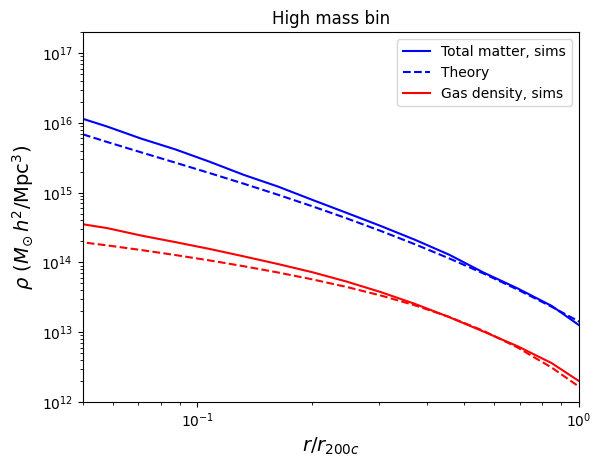

In [140]:
# # rho_dmb_dv.shape
h = 0.7
pl.figure()
pl.errorbar(x_array_data, rho_dmb_dv[1,:],ls='-' , color='b', label='Total matter, sims')
pl.errorbar(x_array_data, rho_dmb_dv_th[1,:],ls='--' , color='b' , label='Theory')

pl.errorbar(x_array_data, rho_gas_dv[1,:],ls='-', color='r', label='Gas density, sims')
pl.errorbar(x_array_data, rho_gas_dv_th[1,:],ls='--', color='r' )
pl.title('High mass bin')

# pl.plot(BCMP_test_vary.r_array, rho_gas_dv[-1], ls='-' )
# pl.plot(BCMP_test_vary.r_array, BCMP_test_vary.rho_dmb_mat[:,indc,0,indM_min], ls='--' )
pl.xscale('log')
pl.yscale('log')
pl.xlabel(r'$r/r_{200c}$', size=14)
pl.xlim(5e-2, 1)
pl.ylim(1e12, 2e17)
pl.legend()
pl.ylabel(r'$\rho$ ($M_{\odot} \, h^2 / {\rm Mpc}^3$)', size=14)




Text(0, 0.5, '$\\rho$ ($M_{\\odot} \\, h^2 / {\\rm Mpc}^3$)')

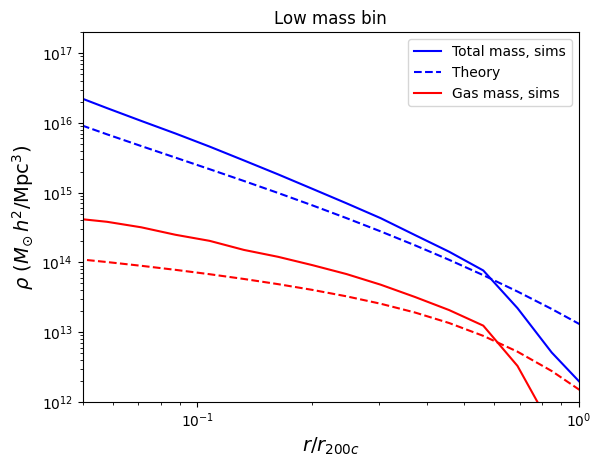

In [141]:
# # rho_dmb_dv.shape
h = 0.7
pl.figure()
pl.errorbar(x_array_data, rho_dmb_dv[0,:],ls='-' , color='b', label='Total mass, sims')
pl.errorbar(x_array_data, rho_dmb_dv_th[0,:],ls='--' , color='b' , label='Theory')

pl.errorbar(x_array_data, rho_gas_dv[0,:],ls='-', color='r', label='Gas mass, sims')
pl.errorbar(x_array_data, rho_gas_dv_th[0,:],ls='--', color='r' )
pl.title('Low mass bin')

# pl.plot(BCMP_test_vary.r_array, rho_gas_dv[-1], ls='-' )
# pl.plot(BCMP_test_vary.r_array, BCMP_test_vary.rho_dmb_mat[:,indc,0,indM_min], ls='--' )
pl.xscale('log')
pl.yscale('log')
pl.xlabel(r'$r/r_{200c}$', size=14)
pl.xlim(5e-2, 1)
pl.ylim(1e12, 2e17)
pl.legend()
pl.ylabel(r'$\rho$ ($M_{\odot} \, h^2 / {\rm Mpc}^3$)', size=14)




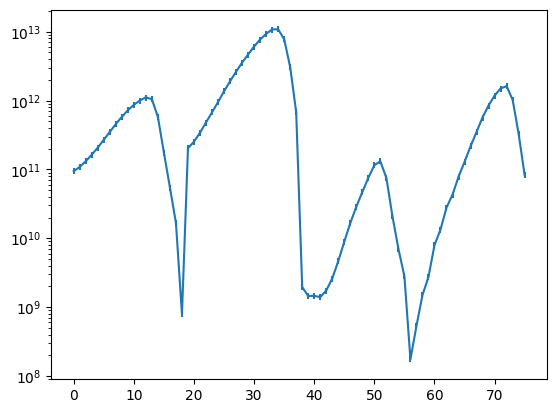

In [19]:
# # rho_dmb_dv.shape
pl.figure()
pl.errorbar(np.arange(len(dv_combined)), dv_combined, sigma_value_combined, ls='-' )
# pl.plot(BCMP_test_vary.r_array, rho_gas_dv[-1], ls='-' )
# pl.plot(BCMP_test_vary.r_array, BCMP_test_vary.rho_dmb_mat[:,indc,0,indM_min], ls='--' )
# pl.xscale('log')
pl.yscale('log')




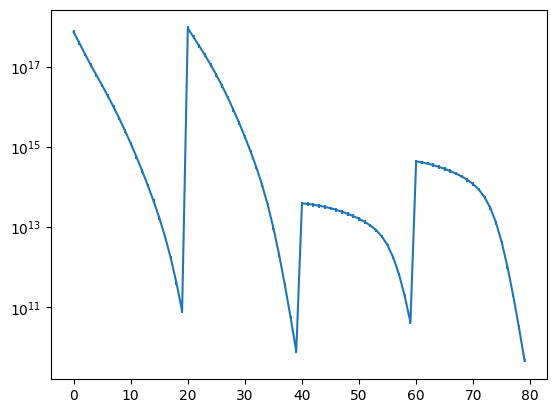

In [16]:
# # rho_dmb_dv.shape
pl.figure()
pl.errorbar(np.arange(len(dv_combined)), dv_combined, sigma_value_combined, ls='-' )
# pl.plot(BCMP_test_vary.r_array, rho_gas_dv[-1], ls='-' )
# pl.plot(BCMP_test_vary.r_array, BCMP_test_vary.rho_dmb_mat[:,indc,0,indM_min], ls='--' )
# pl.xscale('log')
pl.yscale('log')




In [16]:
# # BCMP_test_vary.rho_dmb_mat.shape
# jb = 0
# lgM_min_jb = lgM_bin_min[jb]
# lgM_max_jb = lgM_bin_max[jb]
# cmean_jb = cmean_array[jb]
# c_array_th = BCMP_test_vary.conc_array
# indc = jnp.argmin(jnp.abs(c_array_th - cmean_jb))
# lgM_array_th = jnp.log10(BCMP_test_vary.M_array)
# M_array_th = 10**lgM_array_th
# indM_min = jnp.argmin(jnp.abs(lgM_array_th - lgM_min_jb))
# indM_max = jnp.argmin(jnp.abs(lgM_array_th - lgM_max_jb))

# print(indc, 0, indM_min,indM_max+1, BCMP_test_vary.rho_dmb_mat.shape)




57 0 0 6 (63, 64, 2, 64)


In [20]:
from numpyro.distributions.transforms import AffineTransform
import numpyro.distributions as dist
def Uniform(name, min_value, max_value):
    """ Creates a Uniform distribution in target range from a base
    distribution between [-3, 3]
    """
    s = (max_value - min_value) / 6.
    return numpyro.sample(
            name,
            dist.TransformedDistribution(
                dist.Uniform(-3., 3.),
                AffineTransform(min_value + 3.*s, s),
            ),
        )


/mnt/home/spandey/ceph/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [28]:
# from get_corr_func_jit import get_corrfunc_BCMP
from get_BCMP_profile_jit import BCM_18_wP
import numpyro
import copy
from jax_cosmo.scipy.interpolate import interp
def model():
    #  Cosmological params
    theta_ej = Uniform('theta_ej', 1.0, 6.0)
    log10_Mc0 = Uniform('log10_Mc0', 12.0, 16.0)
    gamma_rhogas = Uniform('gamma_rhogas', 0.8, 4.0)
    delta_rhogas = Uniform('delta_rhogas', 5.0, 12.0)
    eta_star = Uniform('eta_star', 0.05, 0.8)
    eta_cga = Uniform('eta_cga', 0.4, 1.0)
    log10_M1_starcga = Uniform('log10_M1_starcga', 11.0, 12.0)

    sim_params_dict_vary = copy.deepcopy(sim_params_dict)
    sim_params_dict_vary['theta_ej'] = theta_ej
    sim_params_dict_vary['log10_Mc0'] = log10_Mc0
    sim_params_dict_vary['gamma_rhogas'] = gamma_rhogas
    sim_params_dict_vary['delta_rhogas'] = delta_rhogas
    sim_params_dict_vary['eta_star'] = eta_star  
    sim_params_dict_vary['eta_cga'] = eta_cga
    sim_params_dict_vary['log10_M1_starcga'] = log10_M1_starcga
    
    # Now that params are defined, here is the forward model
    # get_corrfunc_BCMP_obj = get_corrfunc_BCMP(sim_params_dict_vary, halo_params_dict, analysis_dict,num_points_trapz_int=32)
    BCMP_test_vary = BCM_18_wP(sim_params_dict_vary, halo_params_dict)
    # theory = BCMP_test_vary.rho_dmb_mat

    rho_dmb = BCMP_test_vary.rho_dmb_mat
    rho_gas = BCMP_test_vary.rho_gas_mat
    
    def interp_rho_dmb(jb, jc, jz, jM):
        rho_dmb_here = rho_dmb[:,jc, jz, jM]
        r_theory = BCMP_test_vary.r_array
        r200_here = BCMP_test_vary.r200c_mat[jM, jz]
        x_bin_min = x_array_data_edges_min[jb]
        x_bin_max = x_array_data_edges_max[jb]
        x_array_here = jnp.logspace(jnp.log10(x_bin_min), jnp.log10(x_bin_max), 20)
        val_x_here = jnp.exp(jnp.interp(jnp.log(x_array_here), jnp.log(r_theory/r200_here), jnp.log(rho_dmb_here)))
        integrand = 4*jnp.pi*x_array_here**2 * val_x_here * (r200_here**3)
        val_out = jnp.trapz(integrand, x_array_here)
        return val_out

    def interp_rho_gas(jb, jc, jz, jM):
        rho_dmb_here = rho_gas[:,jc, jz, jM]
        r_theory = BCMP_test_vary.r_array
        r200_here = BCMP_test_vary.r200c_mat[jM, jz]
        x_bin_min = x_array_data_edges_min[jb]
        x_bin_max = x_array_data_edges_max[jb]
        x_array_here = jnp.logspace(jnp.log10(x_bin_min), jnp.log10(x_bin_max), 20)
        val_x_here = jnp.exp(jnp.interp(jnp.log(x_array_here), jnp.log(r_theory/r200_here), jnp.log(rho_dmb_here)))
        integrand = 4*jnp.pi*x_array_here**2 * val_x_here * (r200_here**3)
        val_out = jnp.trapz(integrand, x_array_here)
        return val_out

    vmap_func1 = vmap(interp_rho_dmb, (0, None, None, None))
    vmap_func2 = vmap(vmap_func1, (None, 0, None, None))
    vmap_func3 = vmap(vmap_func2, (None, None, 0, None))
    vmap_func4 = vmap(vmap_func3, (None, None, None, 0))
    Mtot_xbins_interp = vmap_func4(jnp.arange(len(x_array_data_edges_min)), jnp.arange(halo_params_dict['nc']), jnp.arange(halo_params_dict['nz']), jnp.arange(halo_params_dict['nM'])).T

    vmap_func1 = vmap(interp_rho_gas, (0, None, None, None))
    vmap_func2 = vmap(vmap_func1, (None, 0, None, None))
    vmap_func3 = vmap(vmap_func2, (None, None, 0, None))
    vmap_func4 = vmap(vmap_func3, (None, None, None, 0))
    Mgas_xbins_interp = vmap_func4(jnp.arange(len(x_array_data_edges_min)), jnp.arange(halo_params_dict['nc']), jnp.arange(halo_params_dict['nz']), jnp.arange(halo_params_dict['nM'])).T

    def get_mean_rhodmb(jb):
        lgM_array_th = jnp.log10(BCMP_test_vary.M_array)
        M_array_th = 10**lgM_array_th
        mask = masks_all[jb]
        rho_dmb_rM = Mtot_xbins_interp * mask
        dndlnM_jb_repeat = dndlnM_jb_repeat_all[jb]
        rho_dmb_mean = jnp.trapz(rho_dmb_rM * dndlnM_jb_repeat, jnp.log(M_array_th), axis=-1) / norm_value_all[jb]
        rho_dmb_mean = jnp.sum(rho_dmb_mean, axis=1)
        rho_dmb_mean = jnp.sum(rho_dmb_mean, axis=1)
        return rho_dmb_mean

    def get_mean_rhogas(jb):
        lgM_array_th = jnp.log10(BCMP_test_vary.M_array)
        M_array_th = 10**lgM_array_th
        mask = masks_all[jb]
        rho_gas_rM = Mgas_xbins_interp * mask
        dndlnM_jb_repeat = dndlnM_jb_repeat_all[jb]
        rho_dmb_mean = jnp.trapz(rho_gas_rM * dndlnM_jb_repeat, jnp.log(M_array_th), axis=-1) / norm_value_all[jb]
        rho_dmb_mean = jnp.sum(rho_dmb_mean, axis=1)
        rho_dmb_mean = jnp.sum(rho_dmb_mean, axis=1)
        return rho_dmb_mean

    rho_dmb_dv = vmap(get_mean_rhodmb)(jnp.arange(len(lgM_bin_min)))
    rho_gas_dv = vmap(get_mean_rhogas)(jnp.arange(len(lgM_bin_min)))

    dmb_dv_flatten = rho_dmb_dv.flatten()
    gas_dv_flatten = rho_gas_dv.flatten()

    theory_combined = jnp.concatenate((dmb_dv_flatten, gas_dv_flatten))

    return numpyro.sample('cl', dist.MultivariateNormal(theory_combined, 
                                                        precision_matrix=precision_combined,
                                                        covariance_matrix=cov_combined))





In [29]:
from numpyro.handlers import seed, trace, condition
# Now we condition the model on obervations
observed_model = condition(model, {'cl': dv_combined})



In [30]:
import numpyro
from numpyro.infer.reparam import LocScaleReparam, TransformReparam

def config(x):
    if type(x['fn']) is dist.TransformedDistribution:
        return TransformReparam()
    elif type(x['fn']) is dist.Normal and ('decentered' not in x['name']):
        return LocScaleReparam(centered=0)
    else:
        return None

observed_model_reparam = numpyro.handlers.reparam(observed_model, config=config)




In [31]:
nuts_kernel = numpyro.infer.NUTS(observed_model_reparam,
                                 step_size=1e-1, 
                                 init_strategy=numpyro.infer.init_to_median,
                                 dense_mass=True,
                                 max_tree_depth=5)




In [32]:
mcmc = numpyro.infer.MCMC(nuts_kernel, 
                          num_warmup=300, 
                          num_samples=1000,
                          num_chains=3,
                          chain_method='vectorized',
                        #   chain_method='sequential',                          
                          progress_bar=True)



In [33]:
numpyro.set_platform("gpu")



In [34]:
import jax

mcmc.run(jax.random.PRNGKey(42))




sample: 100%|██████████| 1300/1300 [11:49<00:00,  1.83it/s, 7 steps of size 3.78e-01. acc. prob=0.94] 


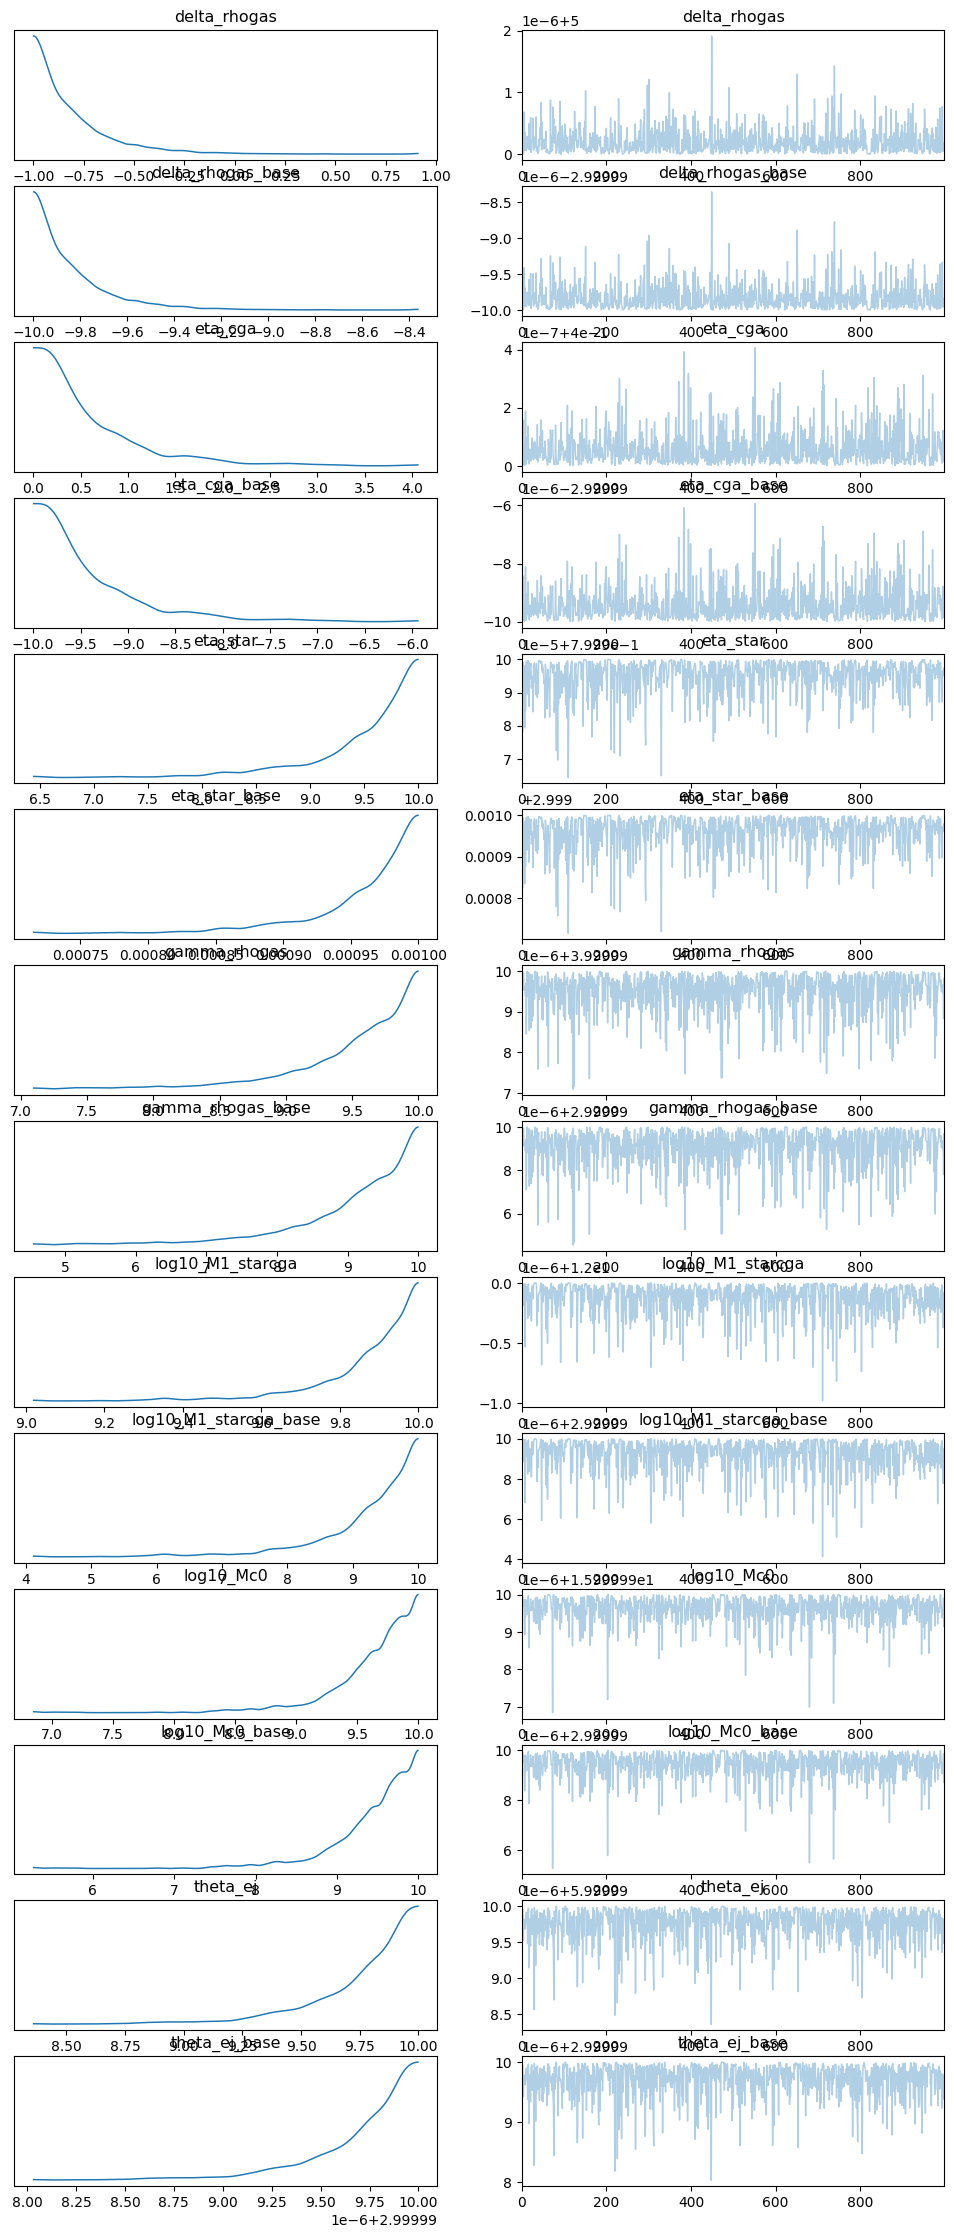

In [35]:
import arviz as az

data = az.from_numpyro(mcmc)
az.plot_trace(data);




In [36]:
s = mcmc.get_samples()




In [40]:
s.keys()


dict_keys(['delta_rhogas', 'delta_rhogas_base', 'eta_cga', 'eta_cga_base', 'eta_star', 'eta_star_base', 'gamma_rhogas', 'gamma_rhogas_base', 'log10_M1_starcga', 'log10_M1_starcga_base', 'log10_Mc0', 'log10_Mc0_base', 'theta_ej', 'theta_ej_base'])

In [37]:
mcmc.print_summary()

    # sim_params_dict_vary['theta_ej'] = theta_ej
    # sim_params_dict_vary['log10_Mc0'] = log10_Mc0
    # sim_params_dict_vary['gamma_rhogas'] = gamma_rhogas
    # sim_params_dict_vary['delta_rhogas'] = delta_rhogas
    # sim_params_dict_vary['eta_star'] = eta_star  
    # sim_params_dict_vary['eta_cga'] = eta_cga
    # sim_params_dict_vary['log10_M1_starcga'] = log10_M1_starcga

    
    


                             mean       std    median      5.0%     95.0%     n_eff     r_hat
      delta_rhogas_base     -3.00      0.00     -3.00     -3.00     -3.00   1192.78      1.00
           eta_cga_base     -3.00      0.00     -3.00     -3.00     -3.00   1242.54      1.00
          eta_star_base      3.00      0.00      3.00      3.00      3.00    646.73      1.01
      gamma_rhogas_base      3.00      0.00      3.00      3.00      3.00   1007.15      1.00
  log10_M1_starcga_base      3.00      0.00      3.00      3.00      3.00   1075.56      1.00
         log10_Mc0_base      3.00      0.00      3.00      3.00      3.00   1156.87      1.00
          theta_ej_base      3.00      0.00      3.00      3.00      3.00   1137.18      1.00

Number of divergences: 0


array([[<Axes: >, None],
       [<Axes: xlabel='theta_ej', ylabel='log10_Mc0'>, <Axes: >]],
      dtype=object)

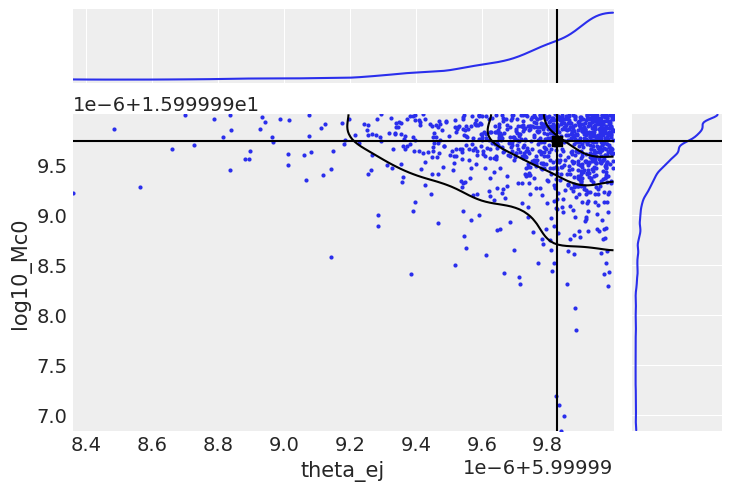

In [38]:
import arviz as az

az.style.use("arviz-darkgrid")

az.plot_pair(
    s,
    kind=["scatter", "kde"],
    var_names=['theta_ej', 'log10_Mc0'],
    kde_kwargs={
        "hdi_probs": [0.3, 0.6, 0.9],  # Plot 30%, 60% and 90% HDI contours
        "contourf_kwargs": {"cmap": "Blues"},
    },
    marginals=True,
    point_estimate="median",
)



In [ ]:
import matplotlib
import sys
if not hasattr(sys, 'ps1'): 
    matplotlib.use('Agg')
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import h5py
import pandas as pd
from scipy import stats
import numpy as np
import os
import glob
import sys

def plot_density_profiles(sim_dir, snap_num, axs, **kwargs):

    # Read radial bins
    rbins = np.loadtxt(f'{sim_dir}/data/profiles_{str(snap_num).zfill(3)}_rbins.txt')

    # Read halos
    halos = pd.read_csv(f'{sim_dir}/data/profiles_{str(snap_num).zfill(3)}_halos.csv')
    # print(halos)

    # Read pressure profiles
    dm_profiles = pd.read_csv(f'{sim_dir}/data/profiles_{str(snap_num).zfill(3)}_rho_dm.csv')
    gas_profiles = pd.read_csv(f'{sim_dir}/data/profiles_{str(snap_num).zfill(3)}_rho_gas.csv')
    stars_profiles = pd.read_csv(f'{sim_dir}/data/profiles_{str(snap_num).zfill(3)}_rho_stars.csv')

    # Make a selection based on halo mass
    mask = np.where(halos.m200 >= 1e14)
    selection_dm = dm_profiles.iloc[mask]
    selection_gas = gas_profiles.iloc[mask]
    selection_stars = stars_profiles.iloc[mask]

    ax0, ax1 = axs
    ax0.plot(rbins,  selection_dm.mean(), **kwargs, ls='-')
    ax0.plot(rbins,  selection_gas.mean(), **kwargs, ls='--', dashes=(10, 10))
    # ax0.plot(rbins,  selection_stars.mean(), **kwargs, ls=':')

    ax1.plot(rbins,  selection_dm.mean() * rbins ** 2, **kwargs, ls='-')
    ax1.plot(rbins,  selection_gas.mean() * rbins ** 2, **kwargs, ls='--', dashes=(10, 10))
    # ax1.plot(rbins,  selection_stars.mean() * rbins ** 2, **kwargs, ls=':')


if __name__ == '__main__':

    gs = gridspec.GridSpec(2, 1, hspace=0.05, height_ratios=[1, 0.75])

    fig = plt.figure(figsize=(5, 6))
    ax0 = plt.subplot(gs[0])
    ax1 = plt.subplot(gs[1])    

    snap = 32 # Redshift z = 0.

    sim_datasets = ['HYDRO_GADGET', 'HYDRO_ANARCHY']

    for index, dataset in enumerate(sim_datasets):
        color = f'C{index}'

        # Give main data directory. 
        data_dir = f'/cosma7old/data/dp004/fkgm22/ANTILLES/L100N256/WMAP9/{dataset}/Sims/'

        # List all simulations inside the directory:
        sims = list(filter(os.path.isdir, glob.glob(f'{data_dir}*')))

        # Plot all sims:
        for i in sims:
            print(i)
            plot_density_profiles(i, snap, [ax0, ax1], c=color, alpha=0.5, lw=0.75)

    ax0.set_xscale('log')
    ax0.set_yscale('log')
    ax0.set_xlim(.03,2)
    ax0.set_xticklabels([])
    ax0.set_ylim(1e12,2e16)   
    ax0.set_ylabel('$\\rho (r)\\,\\, [\\mathrm{M}_\\odot \\, h^{2} \\mathrm{Mpc}^{-3}]$')

    ax1.set_xscale('log')
    ax1.set_yscale('log')
    ax1.set_xlim(.03,2)
    ax1.set_ylim(1e11,5e13) 
    ax1.set_xlabel('$r/r_{200}$')
    ax1.set_ylabel('$\\rho (r) \\, (r/r_{200})^{2} \\,\\, [\\mathrm{M}_\\odot \\, h^{2} \\mathrm{Mpc}^{-3}]$')
    gs.tight_layout(fig)
    fig.savefig('density_profiles.pdf')